# 2.1 분류와 회귀

## 분류: 여러 클래스 레이블 중 하나를 예측
- 이진 분류(BInary Classification)
- 다중 분류(Multiclass Classification)

## 회귀: 연속적인 숫자를 예측
e.g.연간 소득 예측, 수확량 예측

# 2.2 일반화, 과대적합, 과소적합

- 일반화(Generalization):모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다
- 과대적합(Overfitting): 가진 정보를 모두 사용해서 너무 복잡한 모델을 만든 것. 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때
- 과소적합(Underfitting): 모뎅ㄹ이 너무 간단하여 데이터의 면면과 다양성을 잡아내지 못함.

# 2.3 지도 학습 알고리즘

# 2.3.1 데이터셋 확인

In [1]:
!pip install mglearn

In [2]:
import mglearn
import warnings
warnings.filterwarnings(action='ignore')


X, y = mglearn.datasets.make_forge()

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 이진분류 데이터셋

X,shape:  (26, 2)


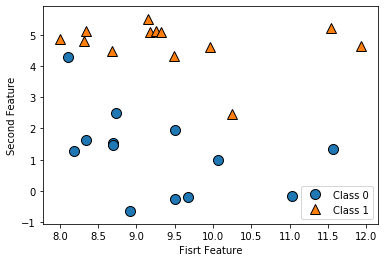

In [3]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('Fisrt Feature')
plt.ylabel('Second Feature')
print('X,shape: ', X.shape)

## 회귀 알고리즘 데이터셋

X.shape:  (40, 1)
y.shape:  (40,)


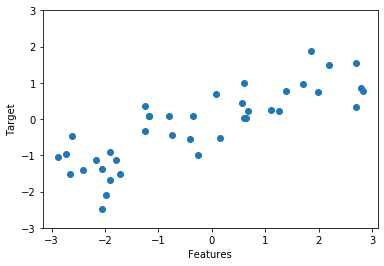

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Features')
plt.ylabel('Target')

print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

## 유방암 종양 데이터

In [5]:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print('유방암 데이터의 형태', cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [7]:
#np.bincount : 해당 nparray에서 각 데이터의 빈도수 세기(범주형)

print('클래스별 샘플 개수 \n',
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

#212개의 악성, 357개의 양성

클래스별 샘플 개수 
 {'malignant': 212, 'benign': 357}


In [8]:
print('특성 이름:\n', cancer.feature_names)
print(len(cancer.feature_names))

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


## 보스턴 주택가격 데이터셋

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
print('데이터의 형태: ', boston.data.shape)

데이터의 형태:  (506, 13)


In [10]:
#load_extended_boston은 13개 중 2개씩 꺼내어 특성끼리 곱하여 새로운 Feature로 만들어
#확장시킨 데이터셋
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: ', X.shape)

X.shape:  (506, 104)


# 2.3.2 K-Nearest Neighbors (KNN)

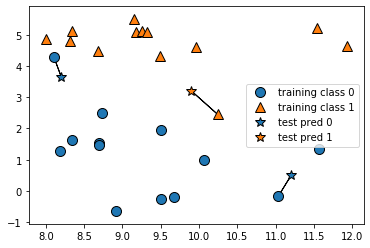

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

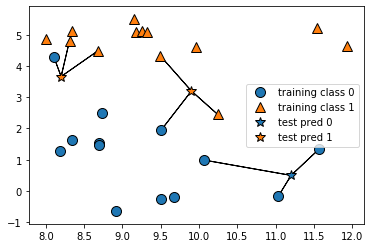

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 한다.

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
print("테스트셋 예측: ", clf.predict(X_test))

테스트셋 예측:  [1 0 1 0 1 0 0]


In [17]:
#y 예측과 y_test 비교하여 모델 평가
print('테스트셋 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트셋 정확도: 0.86


## KNeighborsClassifier 분석

K가 1,3,9일때 각각의 결정경계(Decision Boundary)를 확인해보자.

이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다.
부드러운 경게는 더 단순한 모델을 의미한다.
즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다. 

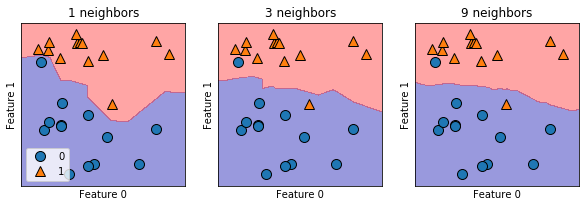

In [18]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for k, ax in zip([1,3,9], axes):
    #fit 메소드는 self 오브젝트를 리턴한다
    #그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=k).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors".format(k))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
axes[0].legend(loc=3)

## 유방암 데이터로 이웃의 수가 다른 KNN

In [19]:
cancer = load_breast_cancer()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#1~10 n_neighbors 적용
neighbors_setting = range(1,11)

In [21]:
for k in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

n_neighbors가 너무 작을때는 과대적합, n_neighbors가 너무 많으면 모델이 너무 단순해져 과소적합

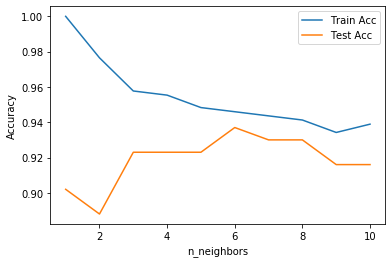

In [22]:
plt.plot(neighbors_setting, training_accuracy, label = 'Train Acc')
plt.plot(neighbors_setting, test_accuracy, label = 'Test Acc')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## K-Nearest Neighbors Regrression

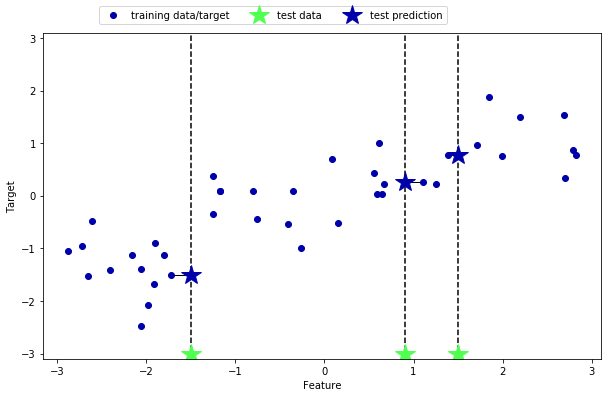

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

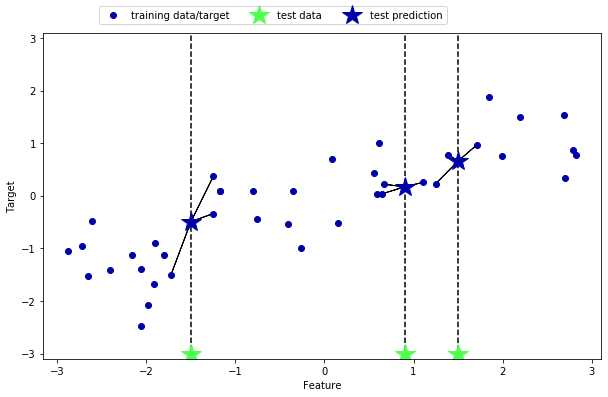

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
print('테스트셋 예측:\n', reg.predict(X_test))

테스트셋 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
print('테스트셋 R^2:{:.2f}'.format(reg.score(X_test, y_test)))

테스트셋 R^2:0.83


## KNeighborsRegressor 분석

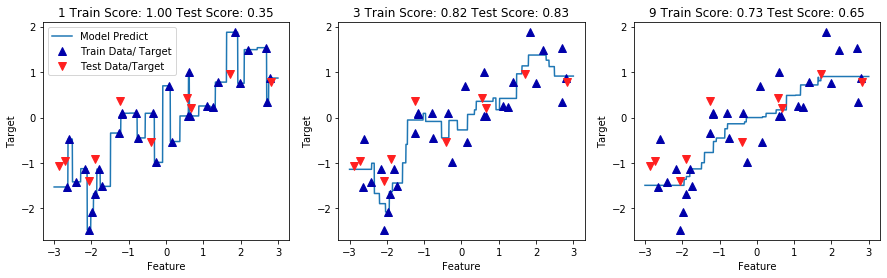

In [29]:
fig, axes = plt.subplots(1,3, figsize = (15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} Train Score: {:.2f} Test Score: {:.2f}'.format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    
axes[0].legend(['Model Predict', 'Train Data/ Target', 'Test Data/Target'], loc='best')

##  KNeighbors 장단점과 매개변수

중요한 매개변수 : 1) 거리를 재는 방법, 2) 이웃의 수

거리를 재는 방법은 기본적으로 유클리디안 거리 방식을 사용한다.

<br></br>
장점: 이해하기 매우 쉬운 모델. 모델을 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 예측이 느려진다.

단점: 전처리 과정이 중요하다. 많은 특성을 가진 데이터셋에는 잘 동작하지 않으며, 특성값 대부분이 0인(즉, 희소한) 데이터셋과는 특히 잘 작동하지 않는다.

# 2.3.3 선형 모델

* 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.

* 쉽게 설명하면 예측값 = (입력 특성 * 각 가중치) 들의 합 

<br></br>

* 회귀를 위한 선형 모델은
    * 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가지고 있다.

w[0]: 0.393906  b: -0.031804


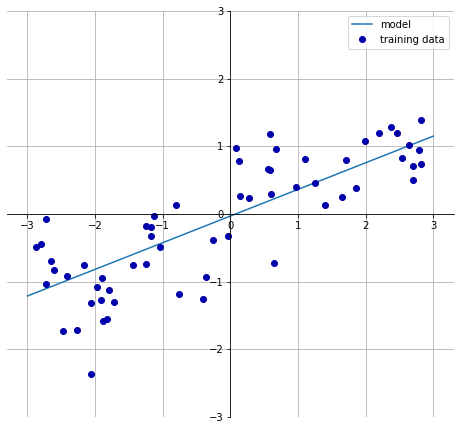

In [30]:
mglearn.plots.plot_linear_regression_wave()

## 선형회귀(Linear Regression) / 최소제곱법(Ordinary Least Squares, OLS)

예측과 훈련 세트에 있는 타겟 y 사이의 평균제곱오차(Mean Squared Error)를 최소화하는 파라미터 w와 b를 찾는다.

MSE = 예측값과 타겟값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것

<img src= ./img/MSE.png width="300" style="float: left;" />

선형회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없다.

In [31]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('lr.coef_(가중치 weight): ', lr.coef_)
print('lr.coef_(편향 offset/절편 intercept): ', lr.intercept_)

lr.coef_(가중치 weight):  [0.39390555]
lr.coef_(편향 offset/절편 intercept):  -0.031804343026759746


coef_ 속성은 각 입력 특성(feature)에 하나씩 대응되는 NumPy 배열이다.

현재 wave 데이터셋에는 입력 특성이 하나뿐이라 lr.coef_도 원소를 하나만 가지고 있다.

In [33]:
# Score = R^2
print('Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test Score: {:2f}'.format(lr.score(X_test, y_test)))

Train Score: 0.67
Test Score: 0.659337


wave 데이터셋에서는 모델이 매우 단순하여 과대적합을 걱정할 필요가 없다.

그러나 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져 과대적합될 가능성이 높다.

보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서는 LinearRegression 모델이 어떻게 동작하는지 한번 살펴보겠다.

## 보스턴 주택가격 LinearRegression

In [34]:
X, y = mglearn.datasets.load_extended_boston()

print('데이터 개수: ', X.shape[0])
print('Feature 개수: ', X.shape[1])

데이터 개수:  506
Feature 개수:  104


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print('Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test Score: {:2f}'.format(lr.score(X_test, y_test)))

Train Score: 0.95
Test Score: 0.607472


Train Score는 높은 반면 Test Score는 낮다. 이러한 성능 차이는 모델이 과대적합되었다는 확실한 신호이다.

따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.

## 리지 회귀 (Ridge) 

#### 규제(Regularization) : 모든 특성이 출력에 주는 영향을 최소한으로 만드는(기울기를 작게) 제약. 과대적합이 되지 않도록 모델을 강제로 제한한다.

- 가중치의 절댓값을 가능한 한 작게 만들어 w의 모든 원소가 0에 가깝게 만든다.

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
print('Train Score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test Score: {:2f}'.format(ridge.score(X_test, y_test)))

Train Score: 0.89
Test Score: 0.752768


훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높다. 

모델의 복잡도가 낮아져 더 일반화된 모델이 되어 과대적합이 적어졌기 때문이다.

Ridge 모델에서 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 제공할 수 있다.

alpha의 default는 1.0

alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.

In [39]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train Score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test Score: {:.2f}".format(ridge10.score(X_test, y_test)))

Train Score: 0.79
Test Score: 0.64


alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀린다.

아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아진다.

In [40]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Train Score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test Score: {:.2f}".format(ridge01.score(X_test, y_test)))

Train Score: 0.93
Test Score: 0.77


alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지 보자.

alpha 값이 크다 = 제약이 많은 모델 = coef_의 절댓값 크기가 작다

alpha 값이 작다 = 제약이 적은 모델 = coef_의 절댓값 크기가 크다

In [41]:
X_train.shape

(379, 104)

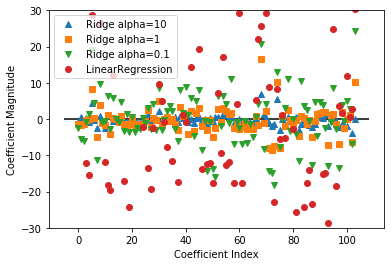

In [42]:
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha=10')
plt.plot(ridge.coef_, 's', label = 'Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label ='LinearRegression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
xlims = plt.xlim() #xlim, ylim 그림 범위지정
# plt.xlims() >>> (-5.15, 1-8.15)
plt.hlines(0, xlims[0], xlims[1])
plt.xlim
plt.ylim(-30,30)
plt.legend()

규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것이다.

보스턴 주택가격 데이터셋에서 여러가지 크기로 샘플링한 것을 LinearRegression과 Ridge(alpha=1)로 적용해보자.

#### 학습곡선(Learning Curve) : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프

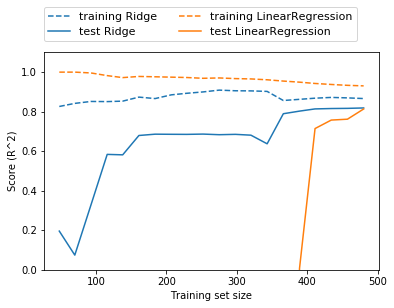

In [43]:
mglearn.plots.plot_ridge_n_samples()

테스트 데이터에서는 리지의 점수가 더 높으며 특히 작은 데이터셋에서는 더 그런 것을 볼 수 있다. 

데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이라는 점을 알 수 있다.

## 라소(Lasso)
#### 리지 회귀와 같이 라소도 계수를 0에 가깝게 만든다. L1 규제의 결과로 라소를 사용할 때 어떤 계수는 정말 0이 된다. 즉, 제외되는 특성이 생긴다. = Feature Selection

In [44]:
from sklearn.linear_model import Lasso

#보스턴 주택 가격
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
print('Train Score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Num of Used Features: ', np.sum(lasso.coef_!=0))

Train Score: 0.29
Test Score: 0.21
Num of Used Features:  4


104개의 특성 중 4개의 특성만 사용되었다. 

훈련 세트와 테스트 세트 모두에서 결과가 좋지 않다. 과소적합 된 것을 볼 수 있다. 

Ridge와 마찬가지로 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수가 있다. default: alpha=1.0

In [46]:
#alpha 값을 줄이기 위해서는 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train)

print('Train Score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Num of Used Features: ', np.sum(lasso001.coef_!=0))

Train Score: 0.90
Test Score: 0.77
Num of Used Features:  33


In [47]:
print('lasso alpha=1의 iteration number: ', lasso.n_iter_)
print('lasso alpha=0.01의 iteration number: ',lasso001.n_iter_)

lasso alpha=1의 iteration number:  34
lasso alpha=0.01의 iteration number:  1886


alpha 값을 낮추면 모델의 복잡도가 증가하여 훈련과 테스트 세트에서 성능이 좋아진다.

하지만 alpha 값은 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

In [48]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

print('Train Score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Num of Used Features: ', np.sum(lasso00001.coef_!=0))

Train Score: 0.95
Test Score: 0.64
Num of Used Features:  96


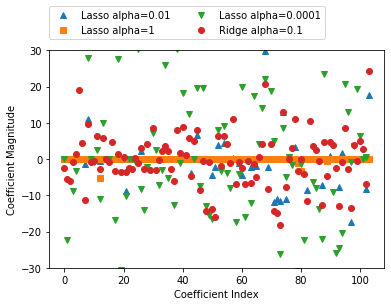

In [49]:
plt.plot(lasso001.coef_, '^', label = 'Lasso alpha=0.01')
plt.plot(lasso.coef_, 's', label = 'Lasso alpha=1')
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label ='Ridge alpha=0.1')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')

plt.xlim
plt.ylim(-30,30)
plt.legend(ncol = 2, loc=(0, 1.05))

## 분류용 선형모델

## 이진 분류 (Binary Classification)

특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치와 비교한다.

임계치보다 작으면 클래스를 -1이라고 예측하고, 임계치보다 크면 +1 이라고 예측한다.

회귀용 선형 모델에서는 출력 y hat 이 특성의 선형 함수였다.

분류용 선형 모델에서는 결정 경계가 입력의 선형 함수이다. 즉, 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.

<br></br>
## 대표적인 선형 분류 알고리즘:

- 로지스틱 회귀 (Logistic Regression)
- 서포트 벡터 머신 (Support Vector Machine)

## Forge 데이터셋 LogisticRegression, LinearSVC

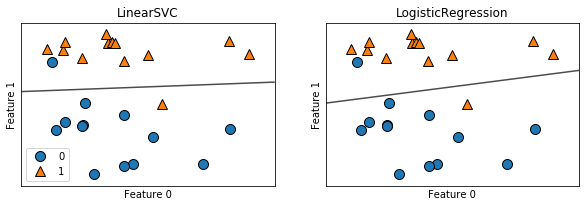

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fg,axes = plt.subplots(1,2, figsize = (10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend()

기본적으로 두 모델 모두 L2 규제를 사용한다.

두 모델의 규제의 강도를 결정하는 매개변수는 C (default: C=1).

C의 값이 높아지면 규제가 감소한다. = 모델이 최대한 훈련 세트에 맞추려 한다 = 개개의 데이터 포인트를 정확히 분류하려고 한다.

반대로 C 값을 낮추면 모델은 계수 벡터(weight)가 0에 가까워지도록 만든다.= 데이터 포인트 중 다수에 맞추려고 한다.

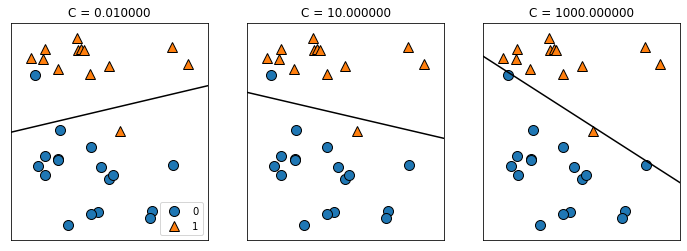

In [51]:
mglearn.plots.plot_linear_svc_regularization()

1. 왼쪽 그림에서는 규제가 많이 적용되어 있어 클래스 0의 대부분은 아래에 있고 클래스 1의 대부부은 위에 있다.
2. 중간 그림은 C값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어져있다.
3. 오른쪽 그림에서 C값을 아주 크게 하였더니 결정 경계는 더 기울었고 클래스 0의 모든 데이터 포인트를 올바로 분류했다.

## 유방암 데이터셋 LogisticRegression

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [53]:
cancer.data.shape

(569, 30)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Train Score: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(logreg.score(X_test, y_test)))

Train Score: 0.95
Test Score: 0.96


훈련과 테스트 모두 꽤 훌륭한 성능을 내고 있으나 두 성능이 매우 비슷하므로 과소적합일 가능성이 있다.

모델의 제약을 더 풀어주기 위해 C를 증가시켜 보자.

In [55]:
# C 증가 = 규제 완화
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)

print('Train Score: {:.2f}'.format(logreg100.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(logreg100.score(X_test, y_test)))

Train Score: 0.98
Test Score: 0.97


In [56]:
# C 감소 = 규제 강화
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)

print('Train Score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test Score: {:.3f}'.format(logreg001.score(X_test, y_test)))

Train Score: 0.934
Test Score: 0.930


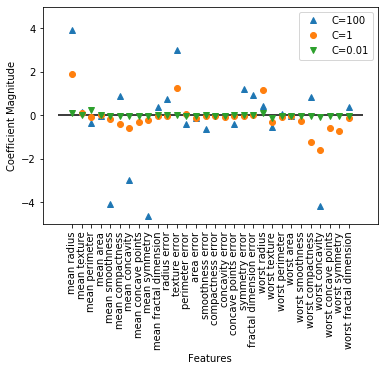

In [57]:
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg001.coef_.T, 'v', label = 'C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.xlim()
plt.ylim(-5,5)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.legend()

LogisticRegression은 기본적으로 L2 규제를 적용하므로 Ridge 모델과 비슷하다.

규제를 강하게 할수록 계수들을 0에 가깝게 만들지만 완전히 0이 되지는 않는다. 

더 쉬운 모델을 원한다면 L1 규제를 사용하는 것이 좋다.

C=0.001인 l1 로지스틱 회귀의 Train Score: 0.91
C=0.001인 l1 로지스틱 회귀의 Test Score: 0.92
---------------------------------------------------
C=1.000인 l1 로지스틱 회귀의 Train Score: 0.96
C=1.000인 l1 로지스틱 회귀의 Test Score: 0.96
---------------------------------------------------
C=100.000인 l1 로지스틱 회귀의 Train Score: 0.99
C=100.000인 l1 로지스틱 회귀의 Test Score: 0.98
---------------------------------------------------


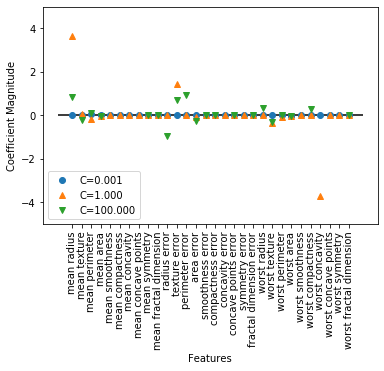

In [58]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('C={:.3f}인 l1 로지스틱 회귀의 Train Score: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('C={:.3f}인 l1 로지스틱 회귀의 Test Score: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    print('---------------------------------------------------')
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.xlim()
plt.ylim(-5,5)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc=3)

## 다중 클래스 분류용 선형 모델

(로지스틱 회귀- 소프트맥스 함수 사용-만 제외하고) 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다. 즉, 다중 클래스를 지원하지 않는다.

이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one-vs.-rest) 방법이다.

- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 학습시킨다.
- 결국 클래스의 수만큼 이진 분류 모델이 만들어진다.
- 예측을 할 때 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.

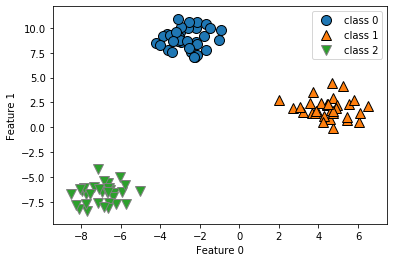

In [59]:
# 세 개의 클래스를 가진 데이터셋 - 일대다 방식 적용
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.legend(['class 0', 'class 1', 'class 2'])

In [60]:
# 위의 데이터셋으로 LinearSVC 분류기를 훈련시켜보자. (일대다)
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape) #계수 배열의 크기
print('Intercept shape: ', linear_svm.intercept_.shape) #절편 배열의 크기

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값을 갖고 있다.
intercept_는 각 클래스의 절편을 담은 1차원 벡터.

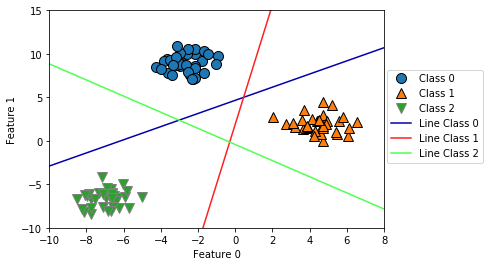

In [61]:
#이진분류기가 만드는 경계를 시각화 해보자

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))

삼각형 영역은 세 분류기가 모두 나머지로 분류했다.

이 곳의 데이터 포인트는 분류 공식의 결과가 가장 높은 클래스, 즉 가장 가까운 직선의 클래스가 될 것이다.

다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과를 보여준다.

Text(0, 0.5, 'Feature 1')

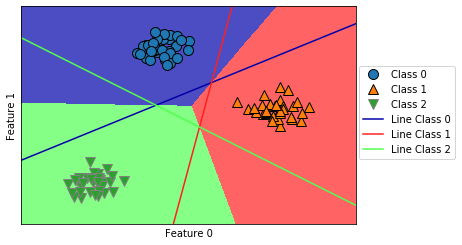

In [62]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line= np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)
    
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

## 장단점과 매개변수

###### 매개변수
선형 모델의 주요 매개변수는
- 회귀 모델에서는 alpha
- LinearSVC와 LogisticRegression에서는 C
    - alpha 값이 클수록, C 값이 작을수록 모델이 단순해진다. 
    
C와 alpha는 로그스케일(자릿수가 바뀌도록 10배씩 변경, 0.01, 1, 10 등)로 최적치를 정하고,

L1 규제를 사용할지 L2 규제를 사용할지 정한다.

###### 장점
- 선형 모델은 학습 속도가 빠르고 예측도 빠르다.
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다.
- 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver='sag' (확률적 평균 경사 하강법) 옵션 준다. 
- 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다.
- 샘플에 비해 특성이 많을 때 잘 작동한다.

# 2.3.4 나이브 베이즈 분류기 (Naive bayes)

LogisticRegression이나 LinearSVC와 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 떨어진다.

나이브 베이즈가 효과적인 이유
- 각 특성을 개별로 취급해 파라미터를 학습
- 각 특성에서 클래스별 통계를 단순하게 취합

Scikit-learn에 구현된 나이브 베이즈 분류기
1. GaussianNB : 연속적인 어떤 데이터에도 적용할 수 있다. 고차원 데이터셋에 사용
2. BernoulliNB : 이진 데이터에 적용. 텍스트 데이터 분류에 사용.
3. MultinomialNB : 카운트 데이터( 특성이 어떤 것을 헤아린 정수 카운트로 예를 들면 문장에 나타난 단어 횟수). 텍스트 데이터 분류에 사용. 0이 아닌 특성이 비교적 많은 데이터셋(큰 문서들)에서 Bernoulli보다 성능이 높다.

## BernoulliNB
각 클래스의 특성 중 0이 아닌 것이 몇 개인지 센다.

In [63]:
X = np.array([[0,1,0,1],
             [1,0,1,1,],
              [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

클래스 0으로 분류된 첫 번째[0,1,0,1], 세 번째[0,0,0,1] 데이터 포인트를 보면

첫 번째 Feature는 모두 0이고, 두 번째 Feature는 1이 한 번, 0이 한 번, 세 번째 Feature는 모두 0, 네 번째 Feature는 모두 1임을 볼 수 있다.

같은 방식으로 클래스 1에 해당하는 데이터 포인트에 대해서도 계산한다.

클래스별로 0이 아닌 원소를 세는 과정을 요약한 것을 아래에서 확인해보자.

In [64]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
    
print('특성 카운트:\n', counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [65]:
y == 0

array([ True, False,  True, False])

In [66]:
X[[True, False, True, False]]
# 클래스 0에 해당하는 첫 번째, 세 번째 데이터 포인트를 가져온다.

array([[0, 1, 0, 1],
       [0, 0, 0, 1]])

MultinomialNB와 GaussianNB는 계산하는 통계 데이터의 종류가 다르다. 

- MlutinomialNB는 클래스별로 특성의 평균을 계산
- GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장

## 장단점과 매개변수

###### 매개변수
MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있다. 

alpha가 주어지면 알고리즘의 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가하여 통계 데이터를 완만하게 만들어준다.

alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다.성능 변동이 비교적 크지 않아 성능 향상에 크게 기여하지는 않으나 정확도를 높일 수 있다. 

###### 장단점
선형모델의 장단점과 유사

훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽다.

희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않다.

선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하다.

# 2.3.5 결정 트리 (Decision Tree)

분류와 회귀 문제에 널리 사용하는 모델로 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다.

In [67]:
#!pip install graphviz

In [68]:
import os
os.environ["PATH"]+=os.pathsep+'C:\Program Files\Graphviz2.38/bin/'

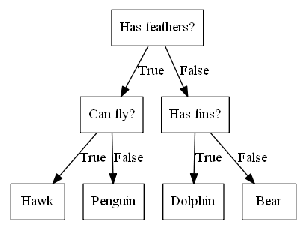

In [69]:
mglearn.plots.plot_animal_tree()

결정 트리를 학습한다 = 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다.

이 질문은 "특성 i는 값 a 보다 큰가?"와 같은 형태를 띤다.

- 루트 노드(root node): 최상위 노드. 데이터 포인트를 모두 포함한 전체 데이터셋
- 리프(leaf): 가장 마지막 노드
- 엣지(edge): 질문의 답과 다음 질문을 연결
- 순수노드(pure node) : 타겟 하나로만 이뤄진 리프 노드 
    

결정트리의 리프가 순수노드가 될 때까지 반복.

## 결정 트리의 복잡도 제어하기

1. 사전 가지치기 (Pre-Prunning) : 트리 생성을 일찍 중단. 
    1. 트리 최대 깊이나 리프의 최대 개수 제한
    2. 노드가 분할하기 위한 포인트의 최소 개수 지정
2. 사후 가지치기 (Post-Prunning) : 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합


scikit-learn은 사전 가지치기만 지원한다.

## 유방암 데이터셋 DecisionTreeClassifier - with Pre-Prunning

In [70]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [71]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Train Acc: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Acc: {:.3f}".format(tree.score(X_test, y_test)))

Train Acc: 1.000
Test Acc: 0.937


In [72]:
#Pre-Prunning

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Train Acc: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Acc: {:.3f}".format(tree.score(X_test, y_test)))

Train Acc: 0.988
Test Acc: 0.951


## 결정 트리 분석

In [73]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ['Bad', 'Good'],
               feature_names = cancer.feature_names, impurity=False, filled=True)

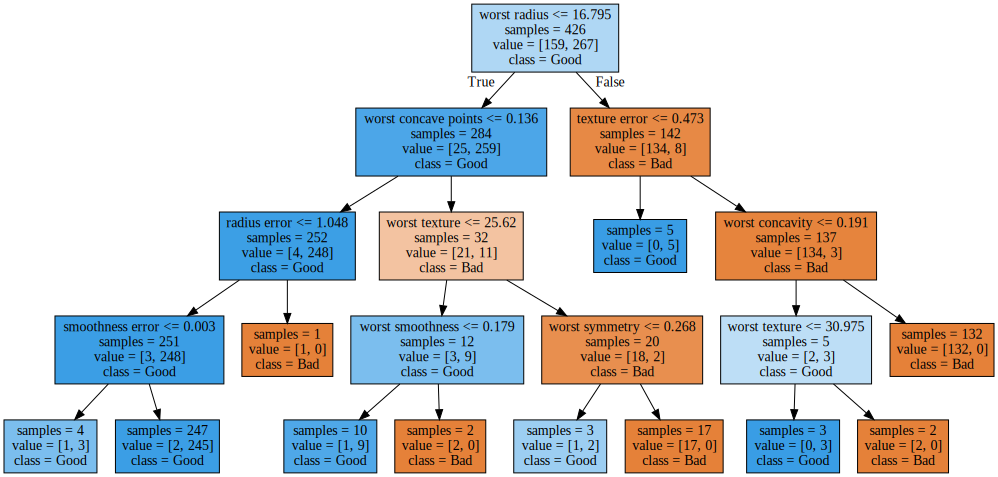

In [74]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 트리의 특성 중요도

트리가 어떻게 작동하는지 요약하는 속성으로 특성 중요도를 사용할 수 있다.

특성 중요도: 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가. 0~! 사이의 숫자로 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻.

특성 중요도의 전체 합은 1이다.

In [75]:
print('Feature Importance:\n', tree.feature_importances_)

Feature Importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


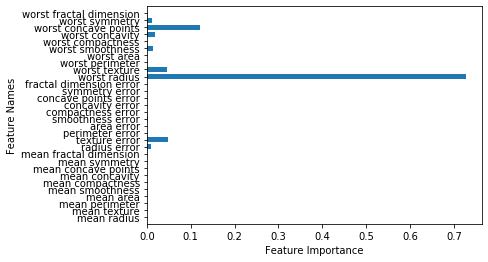

In [76]:
#특성 중요도 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Names")
    
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

feature_importance_의 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아니다.

단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있다. 

선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없다.

Feature importances: [0. 1.]


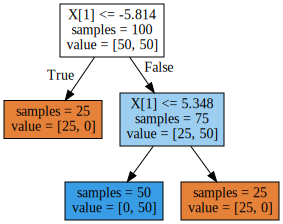

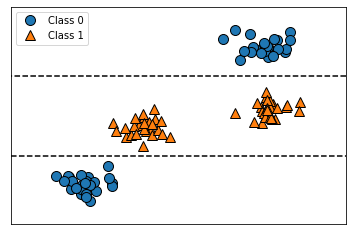

In [77]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

이 그림은 y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋이다.

이처럼 한가지 특성과 출력 클래스와의 간계는 단순하게 비례 또는 반비례 하지 않을 수 있다.

## 회귀 결정 트리

회귀 결정트리의 사용법과 분석은 분류 트리와 매우 비슷하다.

하지만 회귀는 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.

In [78]:
import pandas as pd

Text(0, 0.5, 'Price ($/Mbyte)')

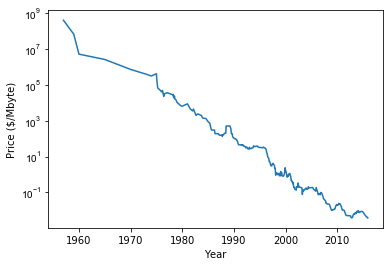

In [79]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

## 2000년 전까지의 데이터로부터 2000년 후의 가격 예측
## DecisionTreeRegressor 와 LinearRegression을 비교

In [80]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]

#가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)

In [81]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

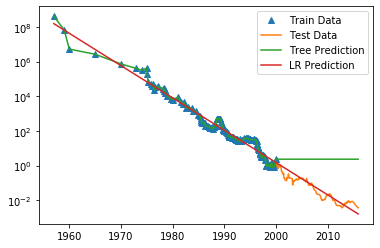

In [82]:
plt.semilogy(data_train.date, data_train.price,'^', label='Train Data')
plt.semilogy(data_test.date, data_test.price, label = 'Test Data')
plt.semilogy(ram_prices.date, price_tree, label = 'Tree Prediction')
plt.semilogy(ram_prices.date, price_lr, label = 'LR Prediction')
plt.legend()

선형 모델은 직선으로 데이터를 근사하였다.

반면에 트리 모델은 훈련 데이터를 완벽하게 예측한다. 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문이다.

그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는게 전부이다.

트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다.

## 장단점과 매개변수
사전 가지치기 방법
1. max_depth
2. max_leafe_nodes
3. min_samples_leaf

###### 장점
1. 만들어진 모델을 쉽게 시각화 가능
2. 데이터의 스케일에 구애받지 않음. > 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다.
3. 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.

###### 단점
1. 과대적합되는 경향이 있어 일반화 성능이 좋지 않다. --> 앙상블 방법이 그 대안이다.

# 2.3.6 결정 트리의 앙상블 (Ensemble)

여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

1. 랜덤 포레스트 (Random Forest) 
2. 그레디언트 부스팅 (Gradient Boosting)

## (1) 랜덤 포레스트

조금씩 다른 여러 결정 트리의 묶음. 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다. 

랜덤 포레스트에서 트리를 랜덤하게 만드는 방법
1. 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법
2. 분할 테스트에서 특성을 무작위로 선택하는 방법

## 랜덤 포레스트 구축

1. 데이터의 부트스트랩 샘플 (Bootstrap Sample)을 생성. `n_samples` 개의 데이터 포인트 중에서 무작위 데이터를 n_sample 횟수만큼 반복 추출(중복 추출 가능) --> 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락될 수도 있고, 어떤 데이터 포인트는 중복될 수 있다. 


2. 생성할 트리의 개수 정함. `n_estimators` 매개변수: 클수록 더 많은 트리를 평균하기 때문에 과대적합을 줄여 더 안정적인 모델을 만든다. 하지만 더 이로 인해 더 많은 메모리 사용과 훈련 시간이 길어진다. 


3. 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고, 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다. 몇 개의 후보 특성을 고를 것인가는 `max_features` 매개변수.
    - n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다.
    
    
4. 예측: 알고리즘이 모델에 있는 모든 트리의 예측을 만든다.
    - 회귀: 이 예측들을 평균하여 최종 예측을 만든다.
    - 분류: 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 한다. 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 된다.

## 랜덤 포레스트 분석
## two_moon 데이터셋. 트리 5개로 구성된 RandomForest 모델

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators = 5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

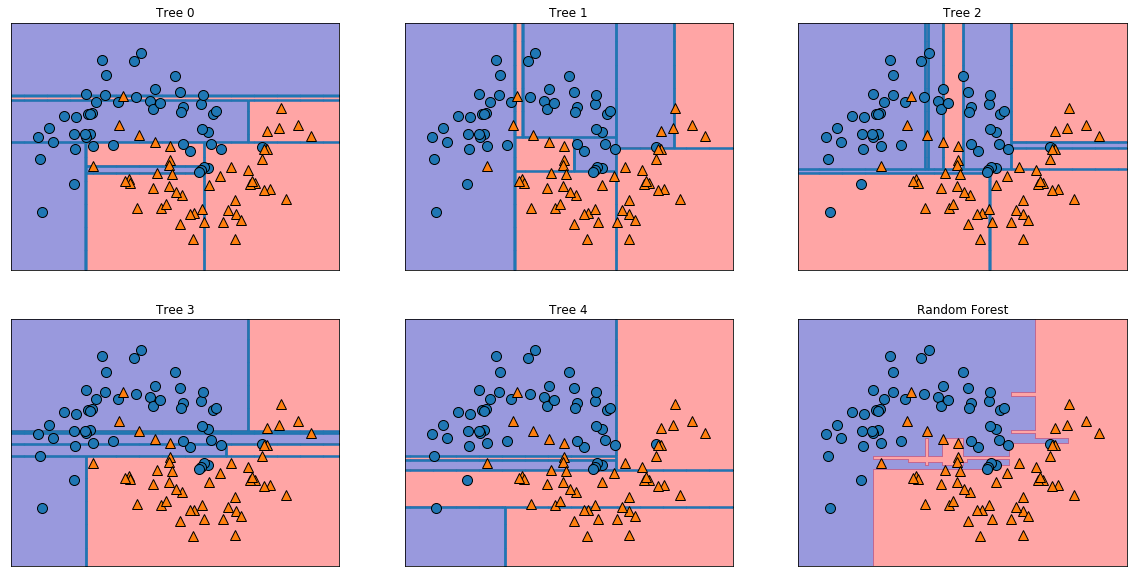

In [84]:
fig, axes = plt.subplots(2,3, figsize =(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0], X[:, 1], y)

## 유방암 데이터셋. 트리 100개로 구성된 Random Forest 모델

In [85]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
print('Train Acc: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test Acc: {:.3f}'.format(forest.score(X_test, y_test)))

Train Acc: 1.000
Test Acc: 0.972


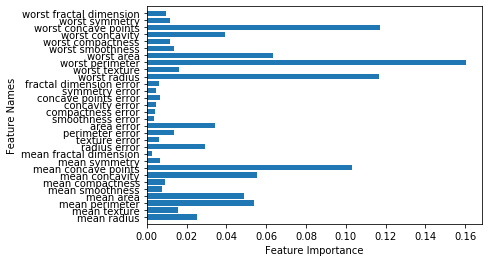

In [87]:
#Decision Tree와 같이 Random Forest도 특성 중요도를 제공한다. 각 트리의 특성 중요도를 취합하여 계산.
#일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리에서 제공하는 것보다 더 신뢰할 만하다.

plot_feature_importances_cancer(forest)

위 그림에서 알 수 있듯이 랜덤 포레스트에서는 단일 트리보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖는다.

랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있게 한다.

## 장단점과 매개변수

랜덤 포레스트는 랜덤하다. 다른 `random_state`를 지정하면 전혀 다른 모델이 만들어진다. 

###### 장점
1. 매우 큰 데이터셋에서도 작동하며 여러 CPU 코어로 간단하게 병렬화할 수 있다. `n_jobs` 매개변수 이용하여 사용할 코어 수 지정.

###### 단점
1. 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다.
2. 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느리다.

## (2) 그레디언트 부스팅 회귀 트리

- 회귀와 분류 모두에 사용할 수 있다.

- 랜덤 포레스트와는 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성한다.

- 기본적으로 무작위성이 없으며 대신 강력한 사전 가지치기가 사용된다. 


- 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다.

    - 그레디언트 부스팅의 근본 아이디어는 이런 얕은 트리 같은 간단한 모델(약한 학습기 weak learner)을 많이 연결하는 것이다.
    
        - `n_estimators` 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아진다. 
        
    - 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될 수록 성능이 좋아진다.
    
- 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 `learning_rate` 매개변수
    
    - 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다.
   

## 유방암 데이터셋 GradientBoostingClassifier. 깊이 3, 100개의 트리, 학습률 0.1

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
print("Train Acc: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Acc: {:.3f}".format(gbrt.score(X_test, y_test)))

Train Acc: 1.000
Test Acc: 0.965


In [90]:
#과대적합을 줄여보자 : 트리의 최대 깊이를 줄이거나 학습률 낮추기

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Train Acc: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Acc: {:.3f}".format(gbrt.score(X_test, y_test)))

Train Acc: 0.991
Test Acc: 0.972


In [91]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Train Acc: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Acc: {:.3f}".format(gbrt.score(X_test, y_test)))

Train Acc: 0.988
Test Acc: 0.965


트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여한 반면 학습률을 낮추는 것은 성능을 조금밖에 개선하지 못했다. 

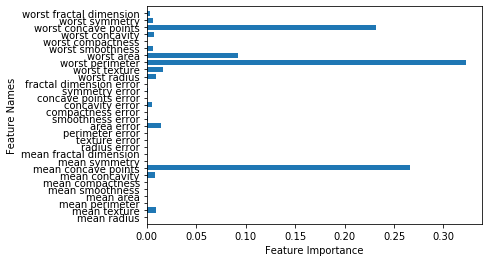

In [92]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

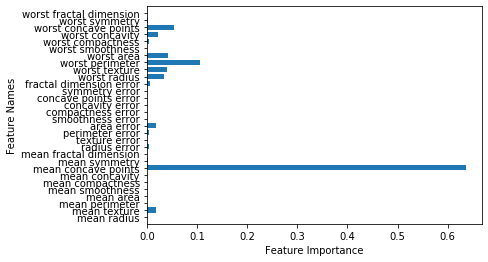

In [93]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 장단점과 매개변수
###### 장점
다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작한다.

###### 단점
매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것.

###### 매개변수
- `n_estimators` : 트리의 개수 지정
- `learning_rate` : 이전 트리의 오차를 보정하는 정도를 조절.

* `learning_rate`를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 한다.
* `n_estimators`가 클수록 좋은 랜덤 포레스트와는 달리 그레디언트 부스팅에서는 모델이 복잡해지고 과대적합될 가능성이 높아진다.

조기종료를 위한 매개변수:

훈련 데이터에서 `validation_fraction`(default: 0.1) 비율만큼 검증 데이터로 사용하여 `n_iter_no_change` (default: None) 반복 동안 검증 점수가 향상되지 않으면 훈련이 종료된다.


## scikit-learn이 제공하는 다른 앙상블 알고리즘
## two-moons, 유방암 데이터셋. 배깅, 에이다부스트, 엑스트라 트리

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# (3) 배깅 (Bagging)

중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습

부트스트랩 샘플을 만드는 것은 랜덤 포레스트와 같다.

분류기가 `predict_proba()` 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행한다. 

그렇지 않은 분류기를 사용할 때는 가장 빈도가 높은 클래스 레이블이 예측 결과가 된다.

배깅은 랜덤 포레스트와 달리 `max_samples` 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있다.

## LogisticRegression 배깅

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                           oob_score=True, n_jobs=1, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=True,
                  random_state=42, verbo

LogisticRegression 객체를 기반 분류기로 전달하고 훈련할 분류기의 개수는 100개로 지정했다. 

`oob_score` 를 Ture로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가한다. ( OOB오차 out of bag 오차 라고도 부른다.)

`oob_score` 값을 통해 테스트 세트의 성능을 짐작할 수 있다. RandomForestClassifier에서도 oob_score 매개변수를 지원한다.

In [96]:
print("Train Acc: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test Acc: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB Sample Acc: {:.3f}".format(bagging.oob_score_))

Train Acc: 0.962
Test Acc: 0.958
OOB Sample Acc: 0.948


## DecisionTree 배깅

In [97]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5
                            ,n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [98]:
print("Train Acc: {:.3f}".format(bagging.score(Xm_train, ym_train)))
print("Test Acc: {:.3f}".format(bagging.score(Xm_test, ym_test)))

Train Acc: 0.987
Test Acc: 0.880


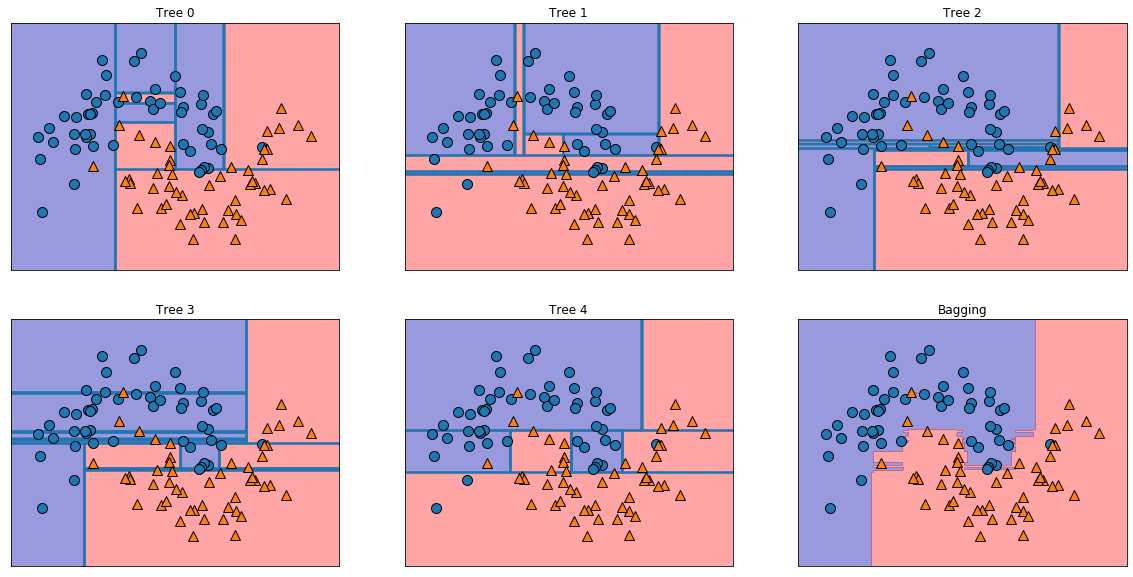

In [99]:
#배깅 분류기에 있는 결정 트리의 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [100]:
#n_estimators = 100 으로 늘려서 cancer 데이셋 훈련시켜보자.

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [101]:
print("Train Acc: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test Acc {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB Sample Acc: {:.3f}".format(bagging.oob_score_))

Train Acc: 1.000
Test Acc 0.965
OOB Sample Acc: 0.951


랜덤 포레스트는 `DecisionTreeClassifier(splitter='best')`를 사용하도록 고정되어 있다.

Decision Tree를 `splitter='random'`으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾는다.

# (4) 엑스트라 트리 (Extra-Tree)

랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다. 

랜덤 포레스트와 달리 `DecisionTreeClassifier(splitter='random')`을 사용하고 부트스트랩 샘플링은 적용하지 않는다.

무작위성을 증가시키면 일반적으로 모델의 편향(bias)는 늘어나지만 분산(variance)는 감소한다. 

엑스트라 트리와 랜덤 포레스트는 다른 방식으로 모델에 무작위성을 주입한다고 볼 수 있다. 

예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값을 평균한다.

In [102]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

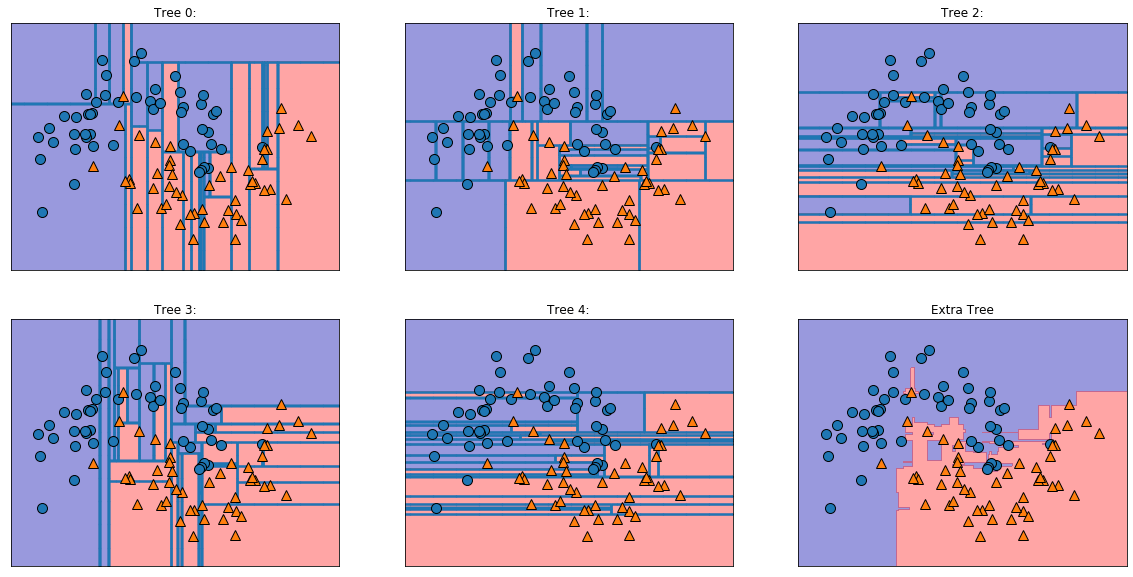

In [103]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('Tree {}:'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Extra Tree')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [104]:
#Extra Tree 트리 개수 100으로 지정

xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('Train Acc: {:3f}'.format(xtree.score(Xc_train, yc_train)))
print('Test Acc: {:.3f}'.format(xtree.score(Xc_test, yc_test)))

Train Acc: 1.000000
Test Acc: 0.972


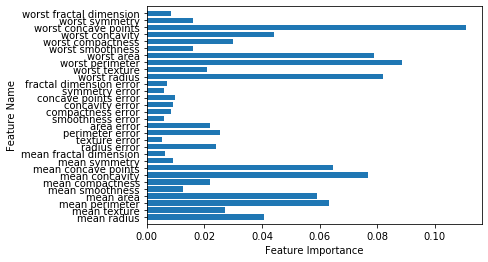

In [105]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.ylim(-1, n_features)
plt.show()

# (5) 에이다부스트 (AdaBoost)

그레디언트 부스팅처럼 약한 학습기를 사용한다. 

그레디언트 부스팅과는 달리 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킨다.

훈련된 각 모델은 성능에 따라 가중치가 부여된다.

예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택한다.

scikit-learn의 AdaBoostClassifier 는 기본값으로 DecisionTreeClassifier(max_depth=1)를 사용하고 

AdaBoostRegressor는 DecisionTreeRegressor(max_depth=3)을 사용한다.

하지만 `base_estimator` 매개변수에서 다른 모델을 지정할 수도 있다.

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

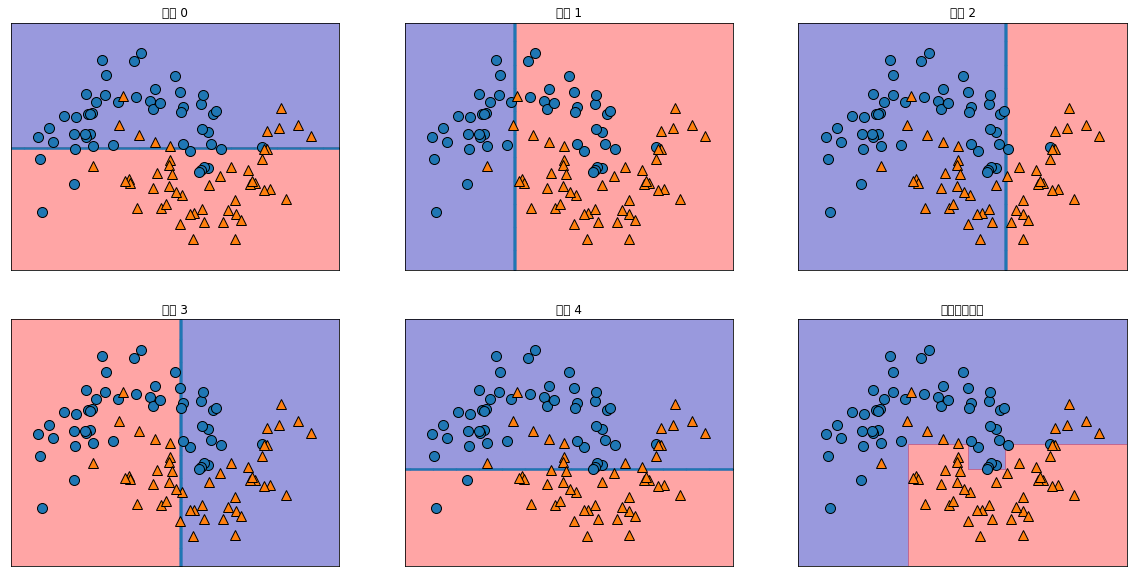

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [108]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [109]:
print("Train Acc : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("Test Acc: {:.3f}".format(ada.score(Xc_test, yc_test)))

Train Acc : 1.000
Test Acc: 0.986


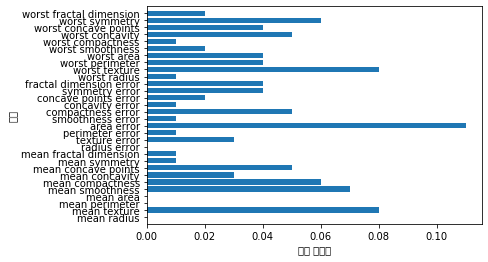

In [110]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

# 커널 서포트 벡터 머신 (Kernelized Support Vector Machines)

입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모데를 만들 수 있도록 확장한 것.

분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 아래 데이터셋에는 잘 들어 맞지 않는다

In [111]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y% 2 #홀수 or 짝수

Text(0, 0.5, 'Feature 1')

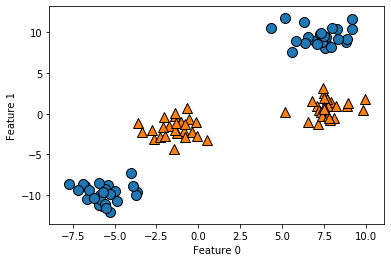

In [112]:

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

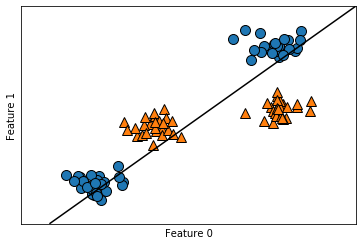

In [113]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

두 번째 특성을 제곱한 Feature1^2 를 새로운 특성으로 추가해 입력 특성을 확장해보자.

이제 (Feature 0, Feature 1) 2차원 데이터 포인트가 아니라 (Feature0, Feature 1, Feature^2)의 3차원 데이터 포인트로 표현된다.

Text(0.5, 0, 'Feature 1^2')

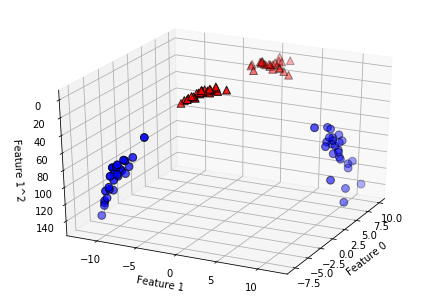

In [114]:
X_new = np.hstack([X, X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax= Axes3D(figure, elev=-152, azim=-26)

#y==0인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그린다.
mask = y ==0
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask, 0],X_new[~mask, 1],X_new[~mask, 2], c = 'r', marker = '^',
           cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1^2')

Text(0.5, 0, 'Feature 1^2')

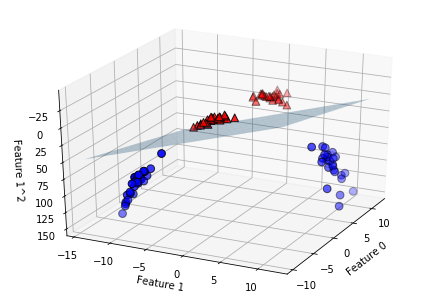

In [115]:
#새로운 데이터셋에서는 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있다.

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:,0].max()+2, 50)


XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY +intercept) / -coef[2]

ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1^2')

Text(0, 0.5, 'Feature 1')

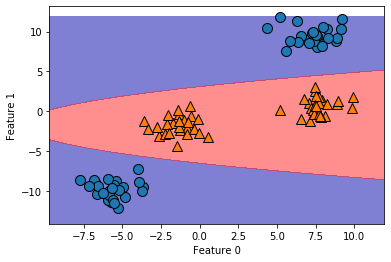

In [116]:
#원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아니다.
##직선보다 타원에 가까운 모습을 하고 있다. 
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 커널기법

앞에서는 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들었다.

하지만 대부분의 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커진다.

이를 해결하기 위해 나온 기법이 '커널 기법'이라고 하며 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리( 스칼라 곱)을 계산한다.

서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 데 사용하는 방법
1. 다항식 커널: 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산 (예. Feature 1^2 * Feature2^5)
2. 가우시안 커널(=RBF 커널) : 차원이 무한한 특성 공간에 매핑하는 것. 모든 차수의 모든 다항식을 고려한다. 하지만 특성의 중요도는 고차항이 될수록 줄어든다.

## SVM 이해하기

학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 된다. 

일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 주는데 바로 두 클래스 사이의 경계에 위치한 데이터 포인트 들이다. 이 데이터 포인트를 '서포트 벡터(Support Vector)'라 한다. 

새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다.

분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습한다. 

In [117]:
from sklearn.svm import SVC

Text(0, 0.5, 'Feature 1')

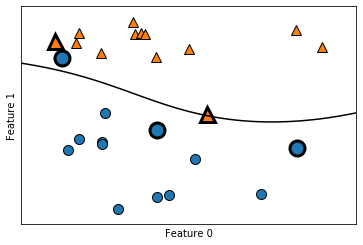

In [118]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

#데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

## SVM 매개변수

1. `gamma` : 가우시안 커널 폭의 역수. 하나의 훈련 샘플이 미치는 영향의 범위를 결정.
    - 작은 값은 넓은 영역을 뜻하며
    - 큰 값은 영향이 미치는 범위가 제한적이다.
    - 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다.
2. `C`: 선형 모델에서 사용한 것과 비슷한 규제 매개변수. 각 포인트의 중요도(dual_coef_값)를 제한한다.

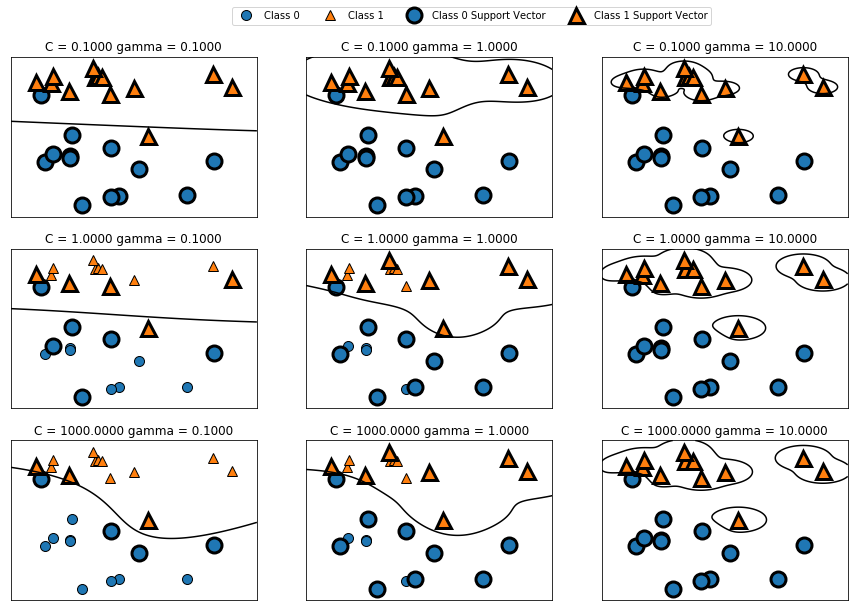

In [119]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(['Class 0', 'Class 1', 'Class 0 Support Vector', 'Class 1 Support Vector'], ncol=4, loc=(.9, 1.2))

###### * gamma
왼쪽에서 오른쪽으로 가면서 gamma 매개변수를 증가시켰다.

작은 gamma 값은 가우시안 커널의 반경을 크게 해 많은 포인트들이 가까이 있는 것으로 고려된다.

따라서 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해진다.

큰 gamma 값은 더 복잡한 모델을 만드는 것을 확인할 수 있다. 

###### * C
위에서 아래로는 C 매개변수를 증가시켰다.

선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작다.

왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않는다.

왼쪽 아래에서 볼 수 있듯이 C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 한다.

## 유방암 데이터셋. RBF 커널 SVM, 기본값 C=1, gamma=1/n_features

In [120]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)


print('Train Acc : {:.2f}'.format(svc.score(X_train,y_train)))
print('Test Acc : {:.2f}'.format(svc.score(X_test,y_test)))

Train Acc : 1.00
Test Acc : 0.63


상당히 과대 적합되었다.

SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감하다.

특히 입력 특성의 범위가 비슷해야 한다.

Text(0, 0.5, 'Scale of Feature')

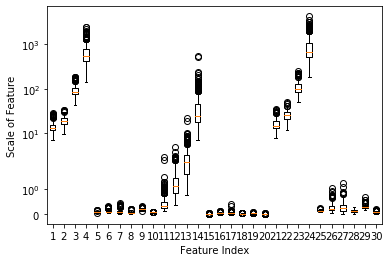

In [121]:
# 각 특성의 최솟값과 최댓값을 로그 스케일로 나타낸 것
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('Feature Index')
plt.ylabel('Scale of Feature')

데이터셋의 특성은 자릿수 자체가 완전히 다른 것을 확인할 수 있다.

이는 일부 모델에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 크다.

## SVM을 위한 데이터 전처리

In [122]:
# train data 에서 특성별 최솟값 계산
min_on_training = X_train.min(axis = 0)

# train data 에서 특성별 범위 계산(max - min)
range_on_training = (X_train - min_on_training).max(axis = 0)

# train data 에서 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최댓값은 1이다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값 \n {}'.format(X_train_scaled.min(axis = 0)))
print('특성별 최댓값 \n {}'.format(X_train_scaled.max(axis = 0)))

특성별 최솟값 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [123]:
#  test data에도 같은 작업을 적용하지만 
# train data 에서 계산한 최솟값과 범위를 사용한다.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [124]:
svc = SVC()
svc.fit(X_train_scaled , y_train)

print("Accuracy on scaled train set : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on scaled test set : {:.3f}".format(svc.score(X_test_scaled , y_test)))

Accuracy on scaled train set : 0.948
Accuracy on scaled test set : 0.951


훈련 세트와 테스트 세트의 정확도가 100%에서는 조금 멀어졌지만 매우 비슷해서 확실히 과소적합된 상태이다.

여기서 C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있다.

In [125]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on scaled train set : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on scaled test set : {:.3f}".format(svc.score(X_test_scaled , y_test)))

Accuracy on scaled train set : 0.988
Accuracy on scaled test set : 0.972


## 장단점과 매개변수

###### 장점
1. 다양한 데이터셋에서 잘 작동한다.
2. 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있다.
3. 저차원이나 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않는다.

###### 단점
1. 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다.
2. 모델 분석이 어려움. 예측이 어떻게 결정되었는지 이해하기 어렵다.

###### 매개변수
1. `C`
2. 커널 선택에 따른 매개변수
    1. 예: RBF 커널은 `gamma` 매개변수

# 2.4 분류 예측의 불확실성 추정

어떤 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지 뿐만 아니라 정확한 클래스임을 '얼마나 확신'하는지가 중요할 때가 많다.

scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수 
1. decision-function
2. predict_proba

GradientBoostingClassifier 분류기의 decision_function과 predict_proba 매서드가 어떤 역할을 하는지 살펴보자

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor =0.5, random_state=1)

#예제를 위해 클래스의 이름을 'blue'와 'red'로 바꾼다
y_named = np.array(['blue', 'red'])[y]

In [127]:
y_named

array(['red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red',
       'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red',
       'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red',
       'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue',
       'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue',
       'red', 'blue', 'blue'], dtype='<U4')

In [128]:
#여러 개의 배열을 한꺼번에 train_test_split에 넣을 수 있따.
X_train, X_test, y_train, y_test, y_train_named, y_test_named = train_test_split(X, y, y_named, random_state = 0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# 2.4.1 결정함수

이진 분류에서 decision_function의 반환값의 크기는 `n_samples`d이며 각 샘플이 하나의 실수 값을 반환한다.

In [129]:
print('X_test.shape: ', X_test.shape)
print('Decision Function shape: ', gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
Decision Function shape:  (25,)


이 값은 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도이다.

양수 값은 양성 클래스를 의미하며 음수 값은 음성(다른) 클래스를 의미한다.

In [130]:
# 결정함수의 일부 확인
print('Decision Function: ', gbrt.decision_function(X_test)[:6])

Decision Function:  [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [131]:
#임계치와 결정 함수 결과 비교
print('Thresholded decision function:\n', gbrt.decision_function(X_test) >0)
print('Prediction:\n', gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 음성 클래스는 항상 classess_ 속성의 첫 번째 원소이고 양성 클래스는 classes_의 두 번째 원소이다.

그래서 predict 함수의 결과를 완전히 재현하려면 classes_의 속성을 사용하면 된다.

In [132]:
#불리언 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)

#classes_에 인덱스로 사용
pred = gbrt.classes_[greater_zero]

print(greater_zero)
print(pred)

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [133]:
#pred 와 gbrt.predict의 결과를 비교
print('pred is equal to predictions: ', np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions:  True


decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.

In [138]:
decision_function = gbrt.decision_function(X_test)
print('Decision function min: {:.2f}, max: {:.2f}'.
      format(np.min(decision_function), np.max(decision_function)))

Decision function min: -7.69, max: 4.29


그레디언트 부스팅 모델의 결정 경계(좌)와 결정함수(우) 비교

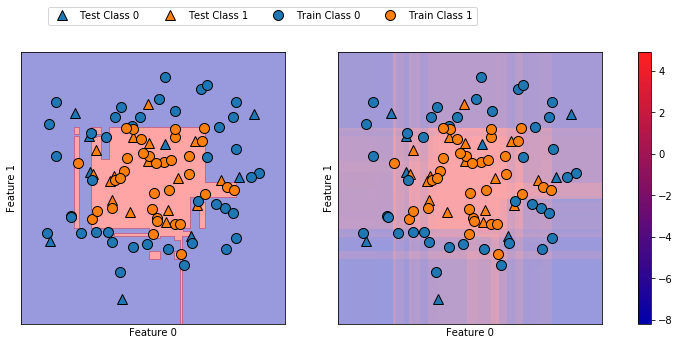

In [143]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers ='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train,
                            markers = 'o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()

axes[0].legend(['Test Class 0', 'Test Class 1', 'Train Class 0', 'Train Class 1'],
              ncol=4, loc=(.1,1.1))

# 2.4.2 예측 확률
`predict_proba`의 출력은 각 클래스에 대한 확률이고 `decision_function`의 출력보다 이해하기 더 쉽다. 

이진 분류에서는 이 크기가 (n_samples, 2)이다

In [144]:
print('Shape of Probabilities: ', gbrt.predict_proba(X_test).shape)

Shape of Probabilities:  (25, 2)


In [147]:
gbrt.predict_proba(X_test[:6])

array([[0.01573626, 0.98426374],
       [0.84575649, 0.15424351],
       [0.98112869, 0.01887131],
       [0.97406775, 0.02593225],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

각 행의 첫 번째 원소는 첫 번째 클래스의 예측 확률이고, 두 번째 원소는 두 번째 클래스의 예측 확률이다.

따라서 출력은 항상 0~1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1이다. 

두 클래스의 확률 합이 1이므로 두 클래스 중 하나는 50% 이상의 확신을 가질 것이 틀림없다. 그리고 바로 그 클래스가 예측값이 된다.

앞의 출력값을 보면 분류기가 대부분의 포인트에서 비교적 강하게 확신하고 있다.

데이터에 있는 불확실성이 얼마나 이 값에 잘 반영되는지는 모델과 매개변수 설정에 달렸다.

과대적합된 모델은 혹 잘못된 예측이더라도 예측의 확신이 강한 편이다. 일반적으로 복잡도가 낮은 모델은 예측에 불확실성이 더 많다. 

이런 불확실성과 모델의 정확도가 동등하면 이 모델이 보정(callibration)되었다고 한다. 즉 보정된 모델에서 70% 확신을 가진 예측은 70%의 정확도를 낼 것이다.

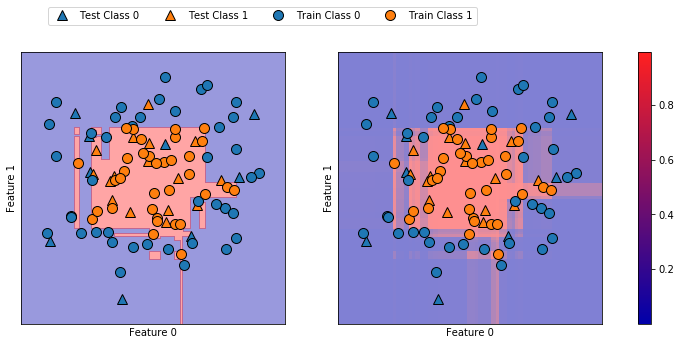

In [148]:
#앞의 데이터와 같은 데이터셋을 사용해 결정 경계와 클래스 1의 확률을 그려보자
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True,
                               cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha =.5,
                                           cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['Test Class 0','Test Class 1', 'Train Class 0', 'Train Class 1'],
              ncol=4, loc=(.1, 1.1))

# 2.4.3 다중 분류에서의 불확실성

In [149]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state =0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [150]:
print('Decision Function shape: ', gbrt.decision_function(X_test).shape)
print('Decision Function:\n', gbrt.decision_function(X_test)[:6,:])

Decision Function shape:  (38, 3)
Decision Function:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


다중 분류에서는 decision_function의 결괏값의 크기가 (n_samples, n_classes)이다.

각 열은 각 클래스에 대한 확신 점수를 담고 있다.

수치가 크면 그 클래스일 가능성이 크고 수치가 작으면 그 클래스일 가능성이 낮다. 

데이터 포인트마다 점수들에서 가장 큰 값을 찾아 예측 결과를 재현한다.

In [154]:
print('Index of the BIggest Decision Function:\n',
     np.argmax(gbrt.decision_function(X_test), axis=1))
print('Prediction: \n', gbrt.predict(X_test))

Index of the BIggest Decision Function:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba의 출력값의 크기는 (n_samples, n_classes)로 앞과 같다.

In [155]:
print('Prediction probability:\n', gbrt.predict_proba(X_test)[:6])
print('Sum: ', gbrt.predict_proba(X_test)[:6].sum(axis=1))

Prediction probability:
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sum:  [1. 1. 1. 1. 1. 1.]


In [156]:
print('Index of the BIggest Decision Function:\n',
     np.argmax(gbrt.predict_proba(X_test), axis=1))
print('Prediction: \n', gbrt.predict(X_test))

Index of the BIggest Decision Function:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


다중 클래스 분류에서 주의할 것은 클래스가 문자열이거나 또는 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수 있다는 것이다. (항상 argmax의 값이 그대로 예측 클래스가 되는 것이 아니다. 예를 들어 클래스의 숫자가 '1'처럼 문자열일 수 있고, 연속된 숫자가 아닐 수 있다)

따라서 분류기의 `classes_` 속성을 사용해 클래스의 실제 이름을 얻어야 한다.

In [ ]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]

In [158]:
named_target

array(['setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'vi

In [157]:
logreg.fit(X_train, named_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
print('Classes in Train Data: ', logreg.classes_)
print('Prediction: ', logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('Index of the Biggest Decision Function: ', argmax_dec_func[:10])
print('Indices to classes_: ', logreg.classes_[argmax_dec_func][:10])

Classes in Train Data:  ['setosa' 'versicolor' 'virginica']
Prediction:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Index of the Biggest Decision Function:  [1 0 2 1 1 0 1 2 1 1]
Indices to classes_:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
